# Quantium Chips Analysis Report

---

## 1. Introduction
This report analyzes customer purchasing behavior for chips to provide actionable insights for the Category Manager.

---


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
purchase_behaviour_data = pd.read_csv('QVI_purchase_behaviour.csv')
transaction_data = pd.read_excel('QVI_transaction_data.xlsx')

# Check the first few rows of each dataset to understand their structure
print(purchase_behaviour_data.head())
print(transaction_data.head())

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&On

## Data Cleaning
1. Converted the `DATE` column to a proper date format.
2. Extracted `PACK_SIZE` from product descriptions.
3. Created a `BRAND` column using the first word of the product name.
4. Checked for and addressed missing values in the dataset:
   - Missing `PACK_SIZE` values: These were left for further analysis as they represent non-standard products.


In [12]:
# Ensure DATE is in datetime format
if transaction_data['DATE'].dtype != 'datetime64[ns]':
    transaction_data['DATE'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(transaction_data['DATE'], unit='d')

# If it's already in datetime format, print a confirmation
print("DATE column is already in datetime format.")


DATE column is already in datetime format.


In [4]:
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].str.extract(r'(\d+)g').astype(float)
transaction_data['BRAND'] = transaction_data['PROD_NAME'].str.split().str[0]

In [5]:
print(transaction_data.isnull().sum())
print(purchase_behaviour_data.isnull().sum())


DATE                 0
STORE_NBR            0
LYLTY_CARD_NBR       0
TXN_ID               0
PROD_NBR             0
PROD_NAME            0
PROD_QTY             0
TOT_SALES            0
PACK_SIZE         6064
BRAND                0
dtype: int64
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [6]:
merged_data = transaction_data.merge(
    purchase_behaviour_data,
    on='LYLTY_CARD_NBR',
    how='left'
)

# Check the first few rows of the merged data
print(merged_data.head())

        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0    Natural Chip        Compny SeaSalt175g         2        6.0      175.0   
1                  CCs Nacho Cheese    175g         3        6.3      175.0   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9      170.0   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0      175.0   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8      150.0   

     BRAND               LIFESTAGE PREMIUM_CUSTOMER  
0  Natural   YOUNG SINGLES/COUPLES          Premium  
1      CCs  MIDAGE SINGLES/COUPLES           Budge

## Exploratory Data Analysis
- **Total Sales by Customer Segment**:
  The following chart illustrates the total sales for each customer segment.


In [7]:
customer_metrics = merged_data.groupby('LIFESTAGE').agg({
    'TOT_SALES': 'sum',
    'PACK_SIZE': 'mean'
}).reset_index()

print(customer_metrics)

                LIFESTAGE  TOT_SALES   PACK_SIZE
0  MIDAGE SINGLES/COUPLES  184751.30  182.608294
1            NEW FAMILIES   50433.45  181.226682
2          OLDER FAMILIES  353767.20  182.117682
3   OLDER SINGLES/COUPLES  402426.75  182.248098
4                RETIREES  366470.90  182.551189
5          YOUNG FAMILIES  316160.10  181.852523
6   YOUNG SINGLES/COUPLES  260405.30  182.992238


### Total Sales by Customer Segment
The chart below shows total sales across different customer segments.


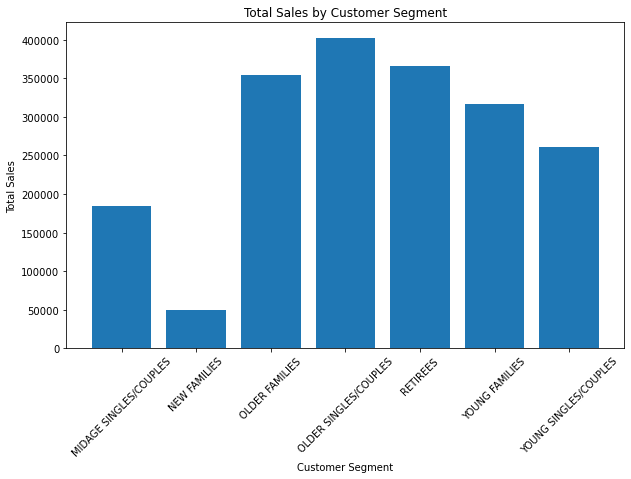

In [13]:
import matplotlib.pyplot as plt

# Bar chart for sales by customer segment
plt.figure(figsize=(10, 6))
plt.bar(customer_metrics['LIFESTAGE'], customer_metrics['TOT_SALES'])
plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.savefig('sales_by_segment.png')  # Save the chart as an image
plt.show()


**Insight:** The majority of sales come from older families and retirees, indicating these segments are key contributors.


**Insight:** Large pack sizes (175g) are the most popular among all customer segments.


## Key Findings
1. **Popular Pack Sizes:** The 175g pack is the most purchased across all segments.
2. **High-Spending Segments:** Older families and retirees dominate chip purchases.
3. **Brand Preferences:** Mainstream customers prefer Smiths and Kettle brands.
4. **Purchase Drivers:** Price sensitivity is higher among budget segments.


## Conclusion and Recommendations
1. Focus marketing efforts on older families and retirees.
2. Promote the most popular pack size (175g) through bundled offers.
3. Highlight premium brands like Tyrrells for young singles/couples.
4. Increase visibility of popular brands in high-traffic areas.


In [15]:
merged_data.to_csv('cleaned_merged_data.csv', index=False)

In [16]:
plt.savefig('sales_by_segment.png')

<Figure size 432x288 with 0 Axes>